# Supervised Learning

## Data Cleanup

#### Importing Libraries

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing Datasets

In [98]:
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### Creating X and y

In [99]:
X = df.iloc[:, :df.shape[1] - 1].values

y = df.iloc[:, df.shape[1] - 1].values

In [100]:
pd.DataFrame(y)

0
0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
20    6
21    5
22    5
23    5
24    6
25    5
26    5
27    5
28    5
29    6
...  ..
1569  6
1570  6
1571  6
1572  5
1573  6
1574  6
1575  6
1576  6
1577  6
1578  6
1579  5
1580  6
1581  5
1582  5
1583  5
1584  7
1585  6
1586  6
1587  6
1588  6
1589  5
1590  6
1591  6
1592  6
1593  6
1594  5
1595  6
1596  6
1597  5
1598  6

[1599 rows x 1 columns]

#### One-hot Encode Y Values

In [101]:
# import preprocessing from sklearn
from sklearn import preprocessing

#### Splitting Datasets into Training Sets and Testing Sets

In [102]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
y_2 = le.fit_transform(y)

In [103]:
pd.DataFrame(y_2)

0
0     2
1     2
2     2
3     3
4     2
5     2
6     2
7     4
8     4
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    4
17    2
18    1
19    3
20    3
21    2
22    2
23    2
24    3
25    2
26    2
27    2
28    2
29    3
...  ..
1569  3
1570  3
1571  3
1572  2
1573  3
1574  3
1575  3
1576  3
1577  3
1578  3
1579  2
1580  3
1581  2
1582  2
1583  2
1584  4
1585  3
1586  3
1587  3
1588  3
1589  2
1590  3
1591  3
1592  3
1593  3
1594  2
1595  3
1596  3
1597  2
1598  3

[1599 rows x 1 columns]

In [104]:
y_2 = y_2.reshape(-1, 1)
pd.DataFrame(y_2)

0
0     2
1     2
2     2
3     3
4     2
5     2
6     2
7     4
8     4
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    4
17    2
18    1
19    3
20    3
21    2
22    2
23    2
24    3
25    2
26    2
27    2
28    2
29    3
...  ..
1569  3
1570  3
1571  3
1572  2
1573  3
1574  3
1575  3
1576  3
1577  3
1578  3
1579  2
1580  3
1581  2
1582  2
1583  2
1584  4
1585  3
1586  3
1587  3
1588  3
1589  2
1590  3
1591  3
1592  3
1593  3
1594  2
1595  3
1596  3
1597  2
1598  3

[1599 rows x 1 columns]

In [105]:
# TODO: create a OneHotEncoder object, and fit it to all of X


# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(y_2)

# 3. Transform
onehotlabels = enc.transform(y_2).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(1599, 6)

In [106]:
pd.DataFrame(onehotlabels)

0    1    2    3    4    5
0     0.0  0.0  1.0  0.0  0.0  0.0
1     0.0  0.0  1.0  0.0  0.0  0.0
2     0.0  0.0  1.0  0.0  0.0  0.0
3     0.0  0.0  0.0  1.0  0.0  0.0
4     0.0  0.0  1.0  0.0  0.0  0.0
5     0.0  0.0  1.0  0.0  0.0  0.0
6     0.0  0.0  1.0  0.0  0.0  0.0
7     0.0  0.0  0.0  0.0  1.0  0.0
8     0.0  0.0  0.0  0.0  1.0  0.0
9     0.0  0.0  1.0  0.0  0.0  0.0
10    0.0  0.0  1.0  0.0  0.0  0.0
11    0.0  0.0  1.0  0.0  0.0  0.0
12    0.0  0.0  1.0  0.0  0.0  0.0
13    0.0  0.0  1.0  0.0  0.0  0.0
14    0.0  0.0  1.0  0.0  0.0  0.0
15    0.0  0.0  1.0  0.0  0.0  0.0
16    0.0  0.0  0.0  0.0  1.0  0.0
17    0.0  0.0  1.0  0.0  0.0  0.0
18    0.0  1.0  0.0  0.0  0.0  0.0
19    0.0  0.0  0.0  1.0  0.0  0.0
20    0.0  0.0  0.0  1.0  0.0  0.0
21    0.0  0.0  1.0  0.0  0.0  0.0
22    0.0  0.0  1.0  0.0  0.0  0.0
23    0.0  0.0  1.0  0.0  0.0  0.0
24    0.0  0.0  0.0  1.0  0.0  0.0
25    0.0  0.0  1.0  0.0  0.0  0.0
26    0.0  0.0  1.0  0.0  0.0  0.0
27    0.0  0.0  1.0  0.0  0.0  0.0
28    0.0  0.0  1.0  0.0  0.0  0.0
29    0.0  0.0  0.0  1.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...
1569  0.0  0.0  0.0  1.0  0.0  0.0
1570  0.0  0.0  0.0  1.0  0.0  0.0
1571  0.0  0.0  0.0  1.0  0.0  0.0
1572  0.0  0.0  1.0  0.0  0.0  0.0
1573  0.0  0.0  0.0  1.0  0.0  0.0
1574  0.0  0.0  0.0  1.0  0.0  0.0
1575  0.0  0.0  0.0  1.0  0.0  0.0
1576  0.0  0.0  0.0  1.0  0.0  0.0
1577  0.0  0.0  0.0  1.0  0.0  0.0
1578  0.0  0.0  0.0  1.0  0.0  0.0
1579  0.0  0.0  1.0  0.0  0.0  0.0
1580  0.0  0.0  0.0  1.0  0.0  0.0
1581  0.0  0.0  1.0  0.0  0.0  0.0
1582  0.0  0.0  1.0  0.0  0.0  0.0
1583  0.0  0.0  1.0  0.0  0.0  0.0
1584  0.0  0.0  0.0  0.0  1.0  0.0
1585  0.0  0.0  0.0  1.0  0.0  0.0
1586  0.0  0.0  0.0  1.0  0.0  0.0
1587  0.0  0.0  0.0  1.0  0.0  0.0
1588  0.0  0.0  0.0  1.0  0.0  0.0
1589  0.0  0.0  1.0  0.0  0.0  0.0
1590  0.0  0.0  0.0  1.0  0.0  0.0
1591  0.0  0.0  0.0  1.0  0.0  0.0
1592  0.0  0.0  0.0  1.0  0.0  0.0
1593  0.0  0.0  0.0  1.0  0.0  0.0
1594  0.0  0.0  1.0  0.0  0.0  0.0
1595  0.0  0.0  0.0  1.0  0.0  0.0
1596  0.0  0.0  0.0  1.0  0.0  0.0
1597  0.0  0.0  1.0  0.0  0.0  0.0
1598  0.0  0.0  0.0  1.0  0.0  0.0

[1599 rows x 6 columns]

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### Feature Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Tools

#### Principal Component Analysis 

In [109]:
# Conduct PCA
from sklearn.decomposition import PCA
def pca_2d(X, y=None, ret_x=False):
    pca = PCA(n_components=2)
    principal_comp = pd.DataFrame(pca.fit_transform(X))
    print('PCA Explained Variance Ratio' + str(pca.explained_variance_ratio_))
    print('PCA CUM SUM: ' + str(pca.explained_variance_ratio_.cumsum()))
    if ret_x: return principal_comp.values
    target_df = pd.DataFrame(y)
    final_df = pd.concat([principal_comp, target_df], axis = 1)
    final_df.columns = ('Principal Component 1', 'Principal Component 2','target')
    return final_df

def pca_3d(X, y):
    pca = PCA(n_components=3)
    principal_comp = pd.DataFrame(pca.fit_transform(X))
    print('PCA Explained Variance Ratio' + str(pca.explained_variance_ratio_))
    print('PCA CUM SUM: ' + str(pca.explained_variance_ratio_.cumsum()))
    target_df = pd.DataFrame(y)
    final_df = pd.concat([principal_comp, target_df], axis = 1)
    final_df.columns = ('Principal Component 1', 'Principal Component 2', 'Principal Component 3','target')
    return final_df

#### Confusion Matrix Tool

In [110]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools
def prediction_results(y_pred, ret=False):
    cm = confusion_matrix(y_test, y_pred)
    total = cm.sum()
    diag_total = np.trace(cm)
    accuracy = diag_total/total
    print('Accuracy: ' + str(accuracy) + '\n')
    print('Confusion Matrix:')
    print(cm)

    classes=['3', '4','5', '6', '7' ,'8']
    plt.imshow(cm, interpolation='nearest')
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if ret: return cm, accuracy

### Visualization Tools


In [111]:
# Plot 2D
def plot_2d(df):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    #ax.set_title('2 component PCA', fontsize = 20)
    targets = [3, 4, 5, 6, 7, 8]
    colors = ['r', 'b', 'g', 'y', 'm', 'c']
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()

In [112]:
# Plot 3D
from mpl_toolkits.mplot3d import Axes3D
def plot_3d(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)
    #ax.set_title('3 component PCA', fontsize = 20)
    targets = [3, 4, 5, 6, 7, 8]
    colors = ['r', 'b', 'g', 'y', 'm', 'c']
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , df.loc[indicesToKeep, 'Principal Component 3']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()

In [113]:
def visualize_classifier(X, y, classifier):

    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'white', 'yellow', 'cyan' )))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue', 'white', 'yellow', 'cyan'))(i), label = j)
    plt.title('Classifier Prediction Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

### Visualizations

In [114]:
pca_2d_data =pca_2d(X, y)

PCA Explained Variance Ratio[0.94657698 0.0483683 ]
PCA CUM SUM: [0.94657698 0.99494528]


In [115]:
type(pca_2d_data)

pandas.core.frame.DataFrame

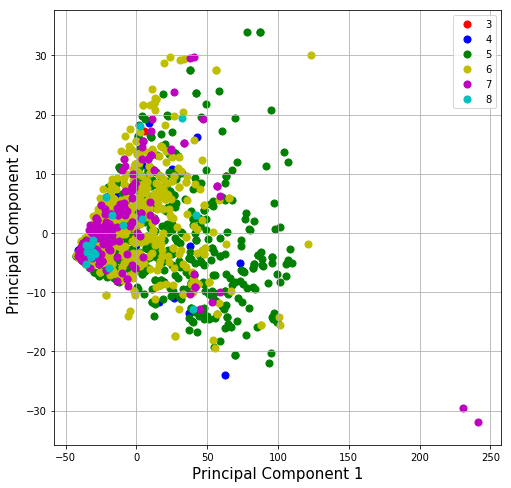

In [116]:
plot_2d(pca_2d_data)

In [117]:
pca_3d_data = pca_3d(X, y)

PCA Explained Variance Ratio[0.94657698 0.0483683  0.00258917]
PCA CUM SUM: [0.94657698 0.99494528 0.99753445]


PCA Explained Variance Ratio[0.94657698 0.0483683  0.00258917]
PCA CUM SUM: [0.94657698 0.99494528 0.99753445]


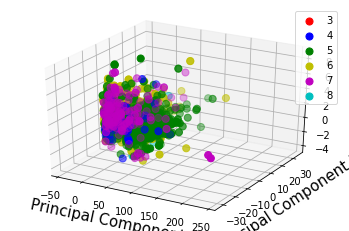

In [118]:
plot_3d(pca_3d(X, y))

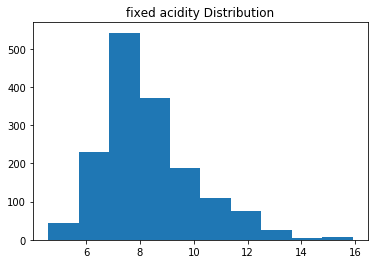

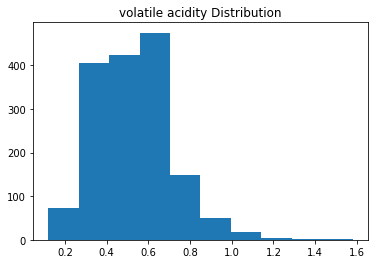

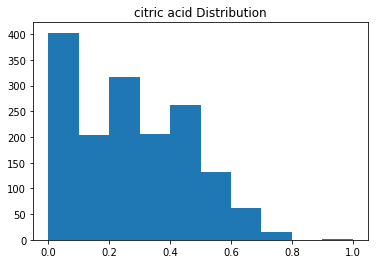

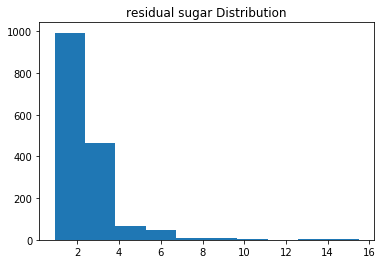

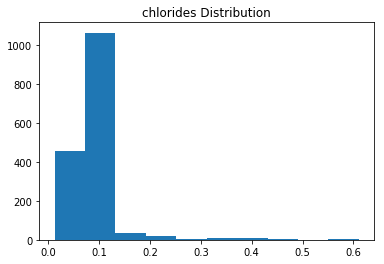

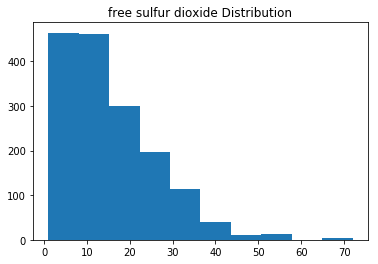

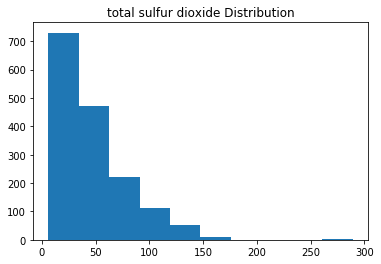

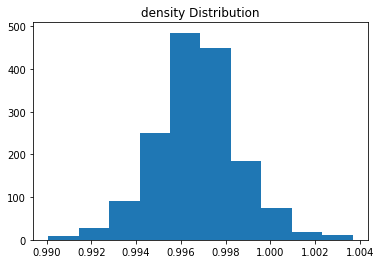

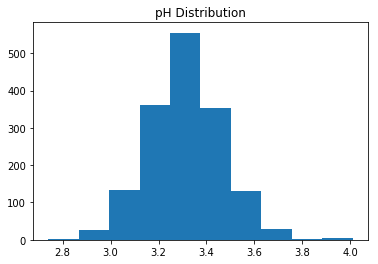

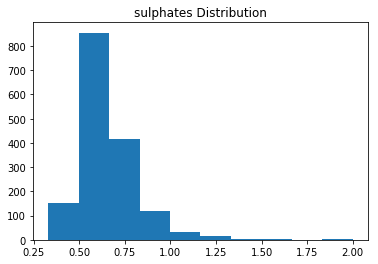

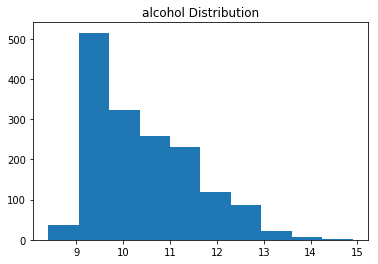

In [119]:
for i in range(0, 11):
    plt.hist(X[:,i])
    plt.title(list(df)[i] + " Distribution")
    plt.show()

#### Outcome Distribution


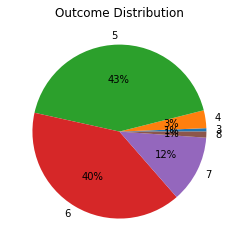

In [120]:
from matplotlib.pyplot import figure
def outcome_distr_pie():
    labels = ['3', '4', '5', '6', '7', '8']
    plt.pie(np.unique(y, return_counts=True)[1], labels=labels, autopct='%1.0f%%',)
    plt.title('Outcome Distribution')
    plt.show()
    
outcome_distr_pie()

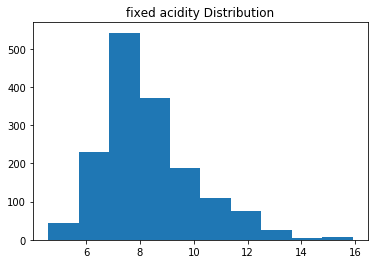

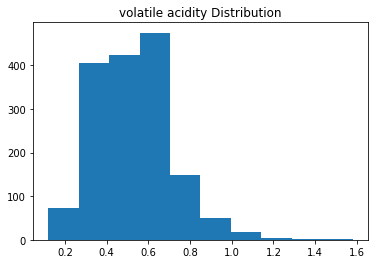

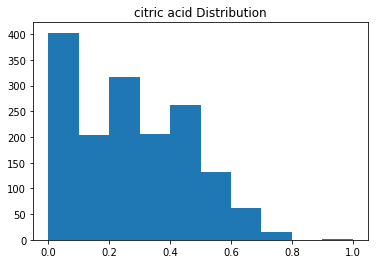

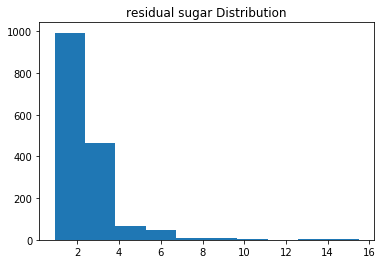

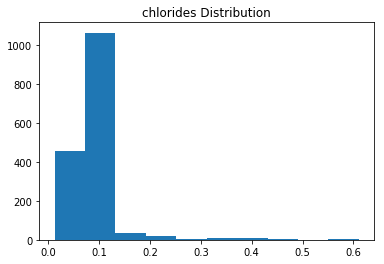

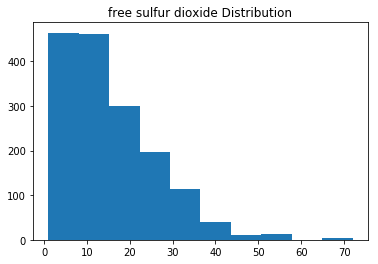

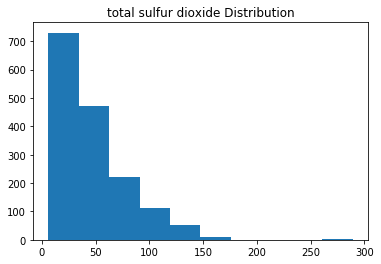

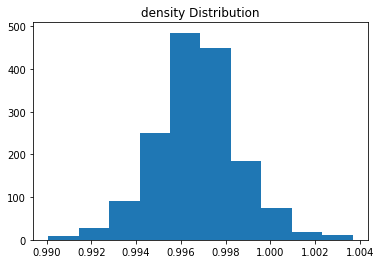

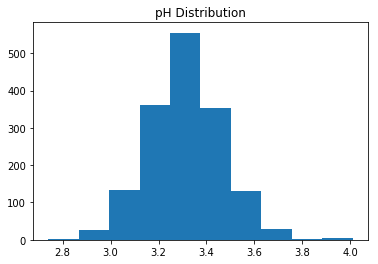

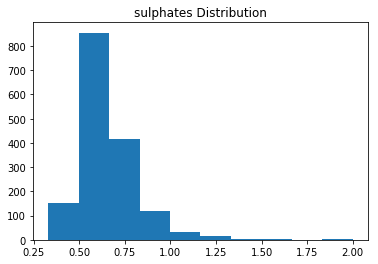

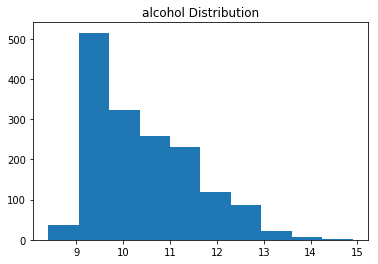

In [121]:
for i in range(0, 11):
    plt.hist(X[:,i])
    plt.title(list(df)[i] + " Distribution")
    plt.show()

## Classifers

### Decision Tree with Pruning


#### Fitting Decision Tree Classification to the Training set

In [122]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtree = DecisionTreeClassifier()
classifier_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree With Pruning, Classification Results:
Accuracy: 0.609375

Confusion Matrix:
[[  1   0   2   0   0   0]
 [  1   0   4   2   2   0]
 [  0   6 101  35   2   0]
 [  0   6  23  76  14   2]
 [  0   1   4  20  15   1]
 [  0   0   0   0   0   2]]


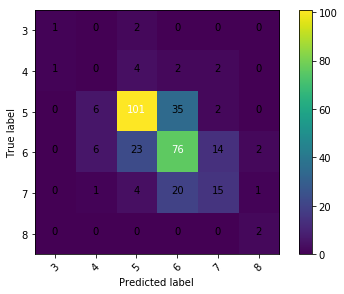

In [123]:
print("Decision Tree With Pruning, Classification Results:")
# Predicting the Test set results
y_pred = classifier_dtree.predict(X_test)
#plt.figure()
prediction_results(y_pred)

#### Feature Importance Plot

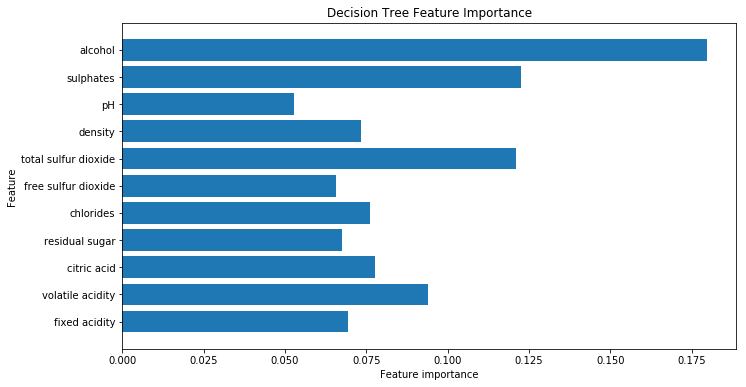

In [124]:
def plot_feature_importances(model):
    plt.figure(figsize=(11,6))
    n_features = 11
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Decision Tree Feature Importance")
    plt.show()

plot_feature_importances(classifier_dtree)

#### Visualize Decision Tree

In [125]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Boosted Decision Tree

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
ada_boosted_dt = AdaBoostClassifier(
    base_estimator= classifier_dtree, n_estimators=200)

In [128]:
ada_boosted_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [129]:
# Predicting the Test set results
y_pred = ada_boosted_dt.predict(X_test)

AdaBoosted Decision Tree, Classification Results:
Accuracy: 0.6

Confusion Matrix:
[[ 1  0  1  1  0  0]
 [ 1  0  5  1  2  0]
 [ 0  5 95 42  2  0]
 [ 0  6 24 76 14  1]
 [ 0  1  3 17 18  2]
 [ 0  0  0  0  0  2]]


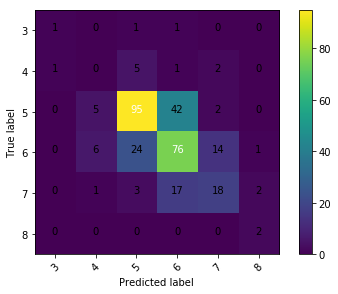

In [130]:
print("AdaBoosted Decision Tree, Classification Results:")
prediction_results(y_pred)

### Support Vector Machine

In [131]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', C = 2.0)
classifier_svm.fit(X_train, y_train)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [132]:
# Predicting the Test set results
y_pred = classifier_svm.predict(X_test)

In [133]:
print("Support Vector Machine, Classification Results:")

Support Vector Machine, Classification Results:


Accuracy: 0.60625

Confusion Matrix:
[[  0   0   2   1   0   0]
 [  0   0   9   0   0   0]
 [  0   0 108  35   1   0]
 [  0   0  36  76   9   0]
 [  0   0   1  30  10   0]
 [  0   0   0   2   0   0]]


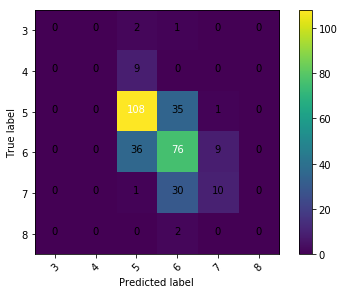

In [134]:
prediction_results(y_pred)

### K-Nearest Neighbors

#### Testing Different K-Values

In [135]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(p=2, n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

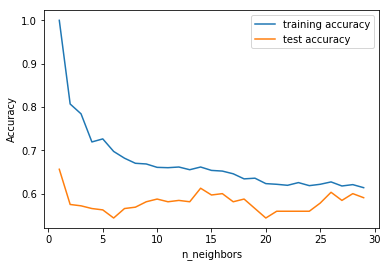

In [136]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### Train Model

In [137]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p=1, n_neighbors = 13)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=1,
           weights='uniform')

In [138]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [139]:
print("K-nearest Neighbors, Classification Results:")

K-nearest Neighbors, Classification Results:


Accuracy: 0.590625

Confusion Matrix:
[[  0   0   3   0   0   0]
 [  0   1   8   0   0   0]
 [  0   1 100  43   0   0]
 [  0   0  39  72  10   0]
 [  0   0   6  19  16   0]
 [  0   0   1   1   0   0]]


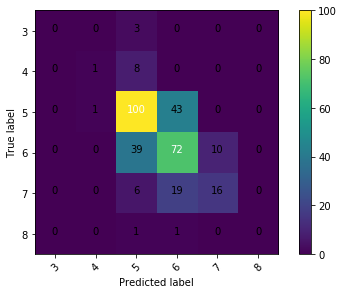

In [140]:
prediction_results(y_pred)

#### Visualize Results

In [141]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
classifier_pca = KNeighborsClassifier(n_neighbors = 11)
classifier_pca.fit(pca_2d(X_train, y_train, ret_x=True), y_train)

PCA Explained Variance Ratio[0.28135694 0.17405931]
PCA CUM SUM: [0.28135694 0.45541624]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [142]:
# Predicting the Test set results
y_pred = classifier_pca.predict(pca_2d(X_test, ret_x=True))

PCA Explained Variance Ratio[0.29944993 0.17719551]
PCA CUM SUM: [0.29944993 0.47664544]


PCA Explained Variance Ratio[0.29944993 0.17719551]
PCA CUM SUM: [0.29944993 0.47664544]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

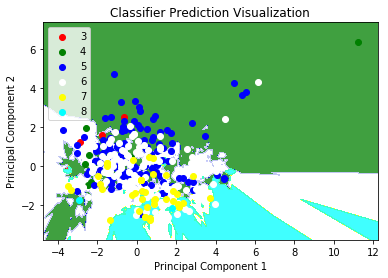

In [143]:
visualize_classifier(pca_2d(X_test, y_test, ret_x=True), y_test, classifier_pca)

### Artificial Neural Networks

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.653125

Confusion Matrix:
[[  1   0   2   0   0   0]
 [  1   2   6   0   0   0]
 [  0   1 102  38   3   0]
 [  0   0  27  79  13   2]
 [  0   0   6   8  24   3]
 [  0   0   0   0   1   1]]


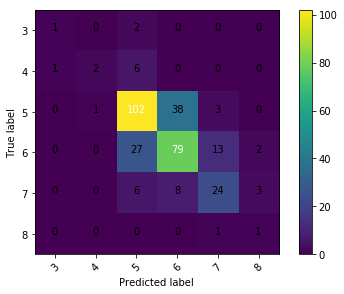

In [144]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(300, 300), max_iter=300)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
prediction_results(y_pred)

# Supervised Learning - Breast Cancer

## Data Preparation

### Importing the Libraries

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [146]:
df = pd.read_csv('breastcancer_data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### Create X and y

In [147]:
X = df.drop(columns=['diagnosis'])

In [148]:
X.shape[1]

32

In [149]:
X = X.iloc[ :, :X.shape[1] - 1]

In [150]:
X.shape

(569, 31)

In [151]:
y = df.iloc[:, 1]

#### One-hot Encode Y Values

In [152]:
# import preprocessing from sklearn
from sklearn import preprocessing

#### Splitting Datasets into Training Sets and Testing Sets

In [153]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
y_2 = le.fit_transform(y)

In [154]:
pd.DataFrame(y_2)

0
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
10   1
11   1
12   1
13   1
14   1
15   1
16   1
17   1
18   1
19   0
20   0
21   0
22   1
23   1
24   1
25   1
26   1
27   1
28   1
29   1
..  ..
539  0
540  0
541  0
542  0
543  0
544  0
545  0
546  0
547  0
548  0
549  0
550  0
551  0
552  0
553  0
554  0
555  0
556  0
557  0
558  0
559  0
560  0
561  0
562  1
563  1
564  1
565  1
566  1
567  1
568  0

[569 rows x 1 columns]

In [155]:
y_2 = y_2.reshape(-1, 1)
pd.DataFrame(y_2)

0
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
10   1
11   1
12   1
13   1
14   1
15   1
16   1
17   1
18   1
19   0
20   0
21   0
22   1
23   1
24   1
25   1
26   1
27   1
28   1
29   1
..  ..
539  0
540  0
541  0
542  0
543  0
544  0
545  0
546  0
547  0
548  0
549  0
550  0
551  0
552  0
553  0
554  0
555  0
556  0
557  0
558  0
559  0
560  0
561  0
562  1
563  1
564  1
565  1
566  1
567  1
568  0

[569 rows x 1 columns]

In [156]:
# TODO: create a OneHotEncoder object, and fit it to all of X


# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(y_2)

# 3. Transform
onehotlabels = enc.transform(y_2).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(569, 2)

In [157]:
pd.DataFrame(onehotlabels)

0    1
0    0.0  1.0
1    0.0  1.0
2    0.0  1.0
3    0.0  1.0
4    0.0  1.0
5    0.0  1.0
6    0.0  1.0
7    0.0  1.0
8    0.0  1.0
9    0.0  1.0
10   0.0  1.0
11   0.0  1.0
12   0.0  1.0
13   0.0  1.0
14   0.0  1.0
15   0.0  1.0
16   0.0  1.0
17   0.0  1.0
18   0.0  1.0
19   1.0  0.0
20   1.0  0.0
21   1.0  0.0
22   0.0  1.0
23   0.0  1.0
24   0.0  1.0
25   0.0  1.0
26   0.0  1.0
27   0.0  1.0
28   0.0  1.0
29   0.0  1.0
..   ...  ...
539  1.0  0.0
540  1.0  0.0
541  1.0  0.0
542  1.0  0.0
543  1.0  0.0
544  1.0  0.0
545  1.0  0.0
546  1.0  0.0
547  1.0  0.0
548  1.0  0.0
549  1.0  0.0
550  1.0  0.0
551  1.0  0.0
552  1.0  0.0
553  1.0  0.0
554  1.0  0.0
555  1.0  0.0
556  1.0  0.0
557  1.0  0.0
558  1.0  0.0
559  1.0  0.0
560  1.0  0.0
561  1.0  0.0
562  0.0  1.0
563  0.0  1.0
564  0.0  1.0
565  0.0  1.0
566  0.0  1.0
567  0.0  1.0
568  1.0  0.0

[569 rows x 2 columns]

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### Feature Scaling

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Tools

#### Principal Component Analysis 

In [160]:
# Conduct PCA
from sklearn.decomposition import PCA
def pca_2d(X, y=None, ret_x=False):
    pca = PCA(n_components=2)
    principal_comp = pd.DataFrame(pca.fit_transform(X))
    print('PCA Explained Variance Ratio' + str(pca.explained_variance_ratio_))
    print('PCA CUM SUM: ' + str(pca.explained_variance_ratio_.cumsum()))
    if ret_x: return principal_comp.values
    target_df = pd.DataFrame(y)
    final_df = pd.concat([principal_comp, target_df], axis = 1)
    final_df.columns = ('Principal Component 1', 'Principal Component 2','target')
    return final_df

def pca_3d(X, y):
    pca = PCA(n_components=3)
    principal_comp = pd.DataFrame(pca.fit_transform(X))
    print('PCA Explained Variance Ratio' + str(pca.explained_variance_ratio_))
    print('PCA CUM SUM: ' + str(pca.explained_variance_ratio_.cumsum()))
    target_df = pd.DataFrame(y)
    final_df = pd.concat([principal_comp, target_df], axis = 1)
    final_df.columns = ('Principal Component 1', 'Principal Component 2', 'Principal Component 3','target')
    return final_df

#### Confusion Matrix Tool

In [161]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools
def prediction_results(y_pred, ret=False):
    cm = confusion_matrix(y_test, y_pred)
    total = cm.sum()
    diag_total = np.trace(cm)
    accuracy = diag_total/total
    print('Accuracy: ' + str(accuracy) + '\n')
    print('Confusion Matrix:')
    print(cm)

    classes=['Benign', 'Malignant']
    plt.imshow(cm, interpolation='nearest')
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if ret: return cm, accuracy

### Visualization Tools


In [162]:
# Plot 2D
def plot_2d(df):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    #ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()

In [163]:
# Plot 3D
from mpl_toolkits.mplot3d import Axes3D
def plot_3d(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)
    #ax.set_title('3 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , df.loc[indicesToKeep, 'Principal Component 3']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()

In [164]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
    
def visualize_classifier(X, y, classifier):

    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Classifier Prediction Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

### Visualizations

In [165]:
pca_2d(X, y_2)

PCA Explained Variance Ratio[1.00000000e+00 2.80767893e-11]
PCA CUM SUM: [1. 1.]


Principal Component 1  Principal Component 2  target
0            -2.952953e+07            1176.590041       1
1            -2.952931e+07            1285.749615       1
2             5.392907e+07             965.498486       1
3             5.397647e+07            -437.551998       1
4             5.398657e+07             900.073378       1
5            -2.952805e+07            -195.025042       1
6            -2.952747e+07             837.810389       1
7             5.408637e+07             -55.528436       1
8            -2.952685e+07            -174.709074       1
9             5.412917e+07            -268.742181       1
10           -2.952620e+07             321.287621       1
11            5.423817e+07             393.838153       1
12           -2.952561e+07             651.153332       1
13           -2.952545e+07              79.689308       1
14            5.429557e+07            -226.938504       1
15            5.442717e+07              25.409456       1
16           -2.952343e+07             252.413655       1
17            5.449017e+07             416.731877       1
18           -2.952282e+07            1631.587304       1
19           -2.186141e+07            -179.323393       0
20           -2.186118e+07            -272.750148       0
21           -2.186101e+07            -671.319873       0
22           -2.186070e+07             124.847656       1
23           -2.952032e+07            1890.250040       1
24           -2.951928e+07            1290.131480       1
25           -2.951920e+07             651.417106       1
26           -2.951907e+07              25.192157       1
27           -2.951905e+07             694.408933       1
28           -2.951886e+07             390.270587       1
29           -2.951863e+07             470.305808       1
..                     ...                    ...     ...
539          -2.945047e+07            -799.471728       0
540          -2.945045e+07            -477.098509       0
541          -2.945045e+07             -44.202878       0
542          -2.945019e+07             -23.085246       0
543          -2.944954e+07            -259.688402       0
544          -2.944953e+07            -184.680363       0
545          -2.944926e+07            -155.285690       0
546          -2.944925e+07            -580.688067       0
547          -2.944899e+07            -606.531803       0
548          -2.944866e+07            -618.541833       0
549          -2.944837e+07            -456.957317       0
550          -2.944808e+07            -538.224593       0
551          -2.944805e+07            -508.115935       0
552          -2.944775e+07            -305.491950       0
553          -2.944749e+07            -688.441370       0
554          -2.944720e+07            -301.360585       0
555          -2.944690e+07            -605.676695       0
556          -2.944687e+07            -619.511191       0
557          -2.944660e+07            -654.163343       0
558          -2.944655e+07            -108.651561       0
559          -2.944654e+07            -462.789243       0
560          -2.944654e+07            -160.673268       0
561          -2.944652e+07            -501.470757       0
562          -2.944621e+07              78.522536       1
563          -2.944571e+07            1183.723631       1
564          -2.944541e+07            1430.693656       1
565          -2.944515e+07            1061.599145       1
566          -2.944488e+07             331.077904       1
567          -2.944459e+07            1141.435887       1
568          -3.027908e+07            -754.562301       0

[569 rows x 3 columns]

In [166]:
pca_2d_data = pca_2d(X, y_2) 

PCA Explained Variance Ratio[1.00000000e+00 2.80767893e-11]
PCA CUM SUM: [1. 1.]


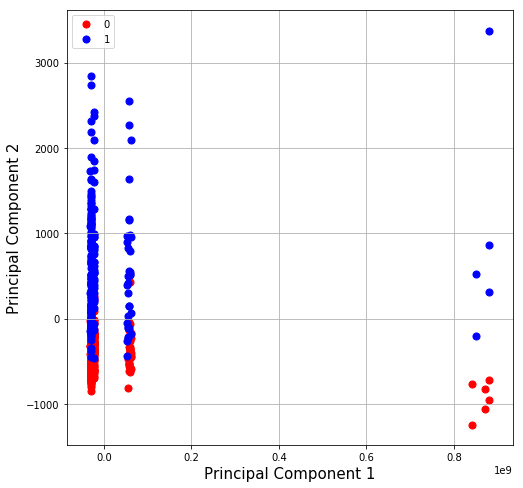

In [167]:
plot_2d(pca_2d_data)

In [168]:
pca_3d_data = pca_3d(X, y_2)

PCA Explained Variance Ratio[1.00000000e+00 2.80767893e-11 4.67287322e-13]
PCA CUM SUM: [1. 1. 1.]


PCA Explained Variance Ratio[1.00000000e+00 2.80767893e-11 4.67287322e-13]
PCA CUM SUM: [1. 1. 1.]


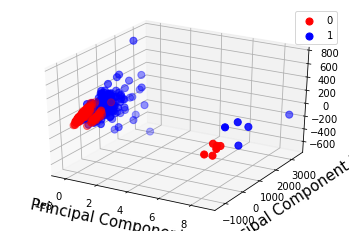

In [169]:
plot_3d(pca_3d(X, y_2))

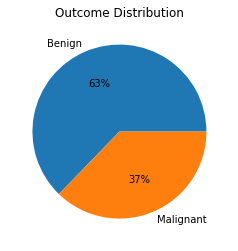

In [170]:
from matplotlib.pyplot import figure
def outcome_distr_pie():
    labels = ['Benign', 'Malignant']
    plt.pie(np.unique(y, return_counts=True)[1], labels=labels, autopct='%1.0f%%',)
    plt.title('Outcome Distribution')
    plt.show()
    
outcome_distr_pie()

## Classifers

### Decision Tree with Pruning


#### Fitting Decision Tree Classification to the Training set

In [171]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtree = DecisionTreeClassifier()
classifier_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree With Pruning, Classification Results:
Accuracy: 0.9385964912280702

Confusion Matrix:
[[72  3]
 [ 4 35]]


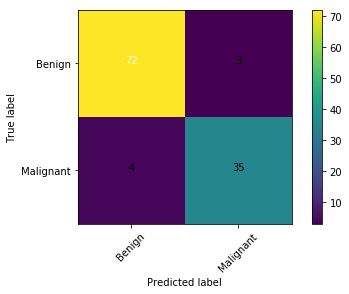

In [172]:
print("Decision Tree With Pruning, Classification Results:")
# Predicting the Test set results
y_pred = classifier_dtree.predict(X_test)
#plt.figure()
prediction_results(y_pred)

#### Feature Importance Plot

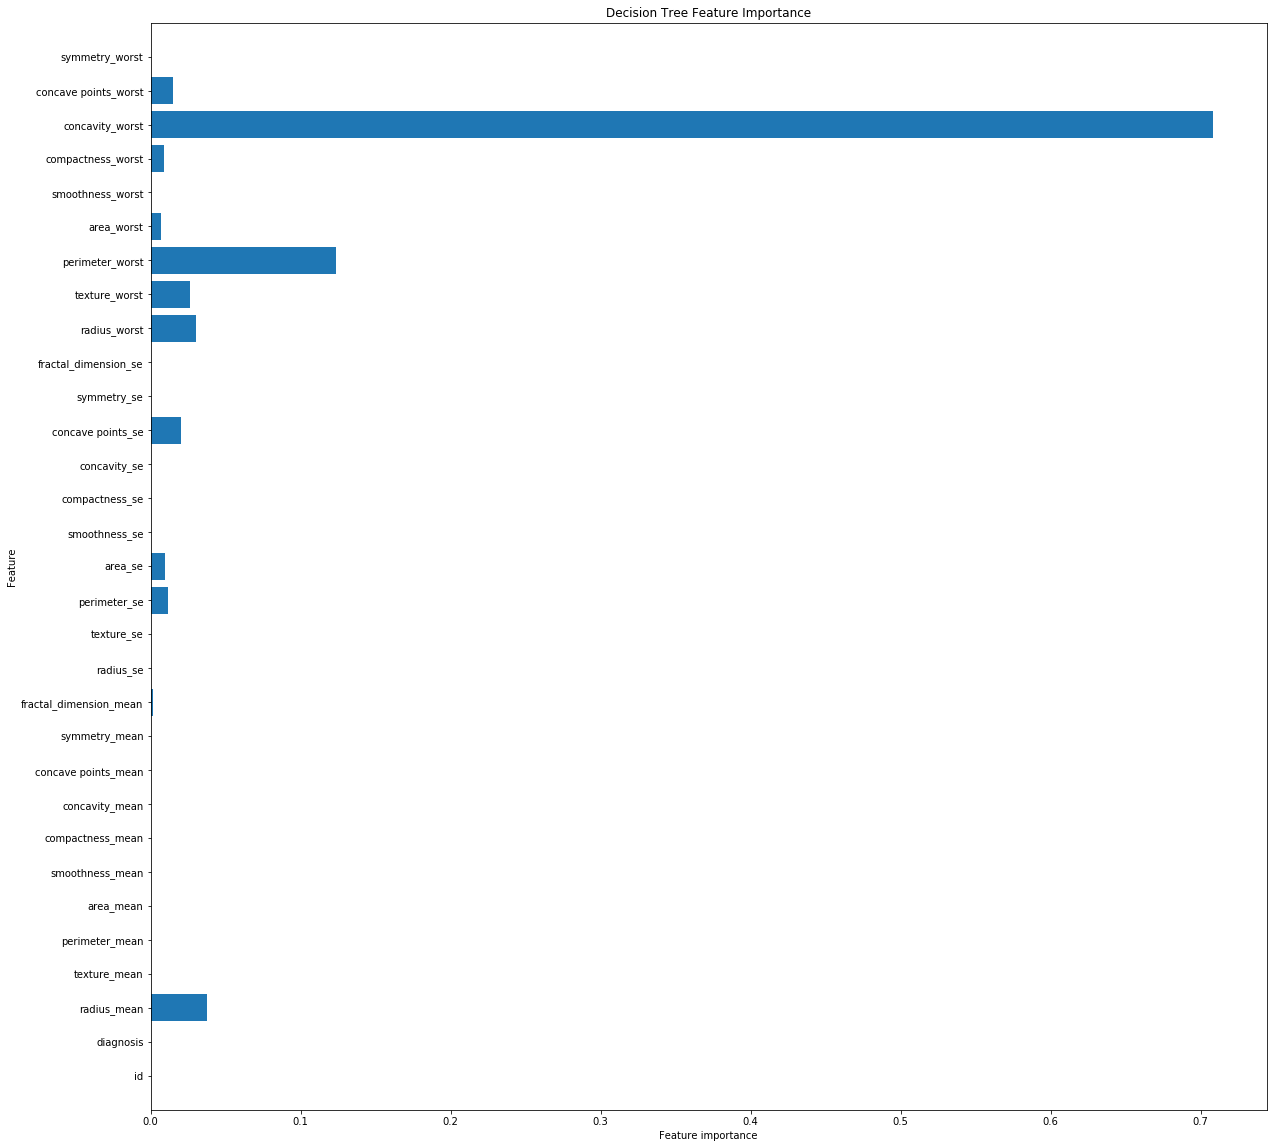

In [173]:
def plot_feature_importances(model):
    plt.figure(figsize=(20,20))
    n_features = 31
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Decision Tree Feature Importance")
    plt.show()

plot_feature_importances(classifier_dtree)

#### Visualize Decision Tree

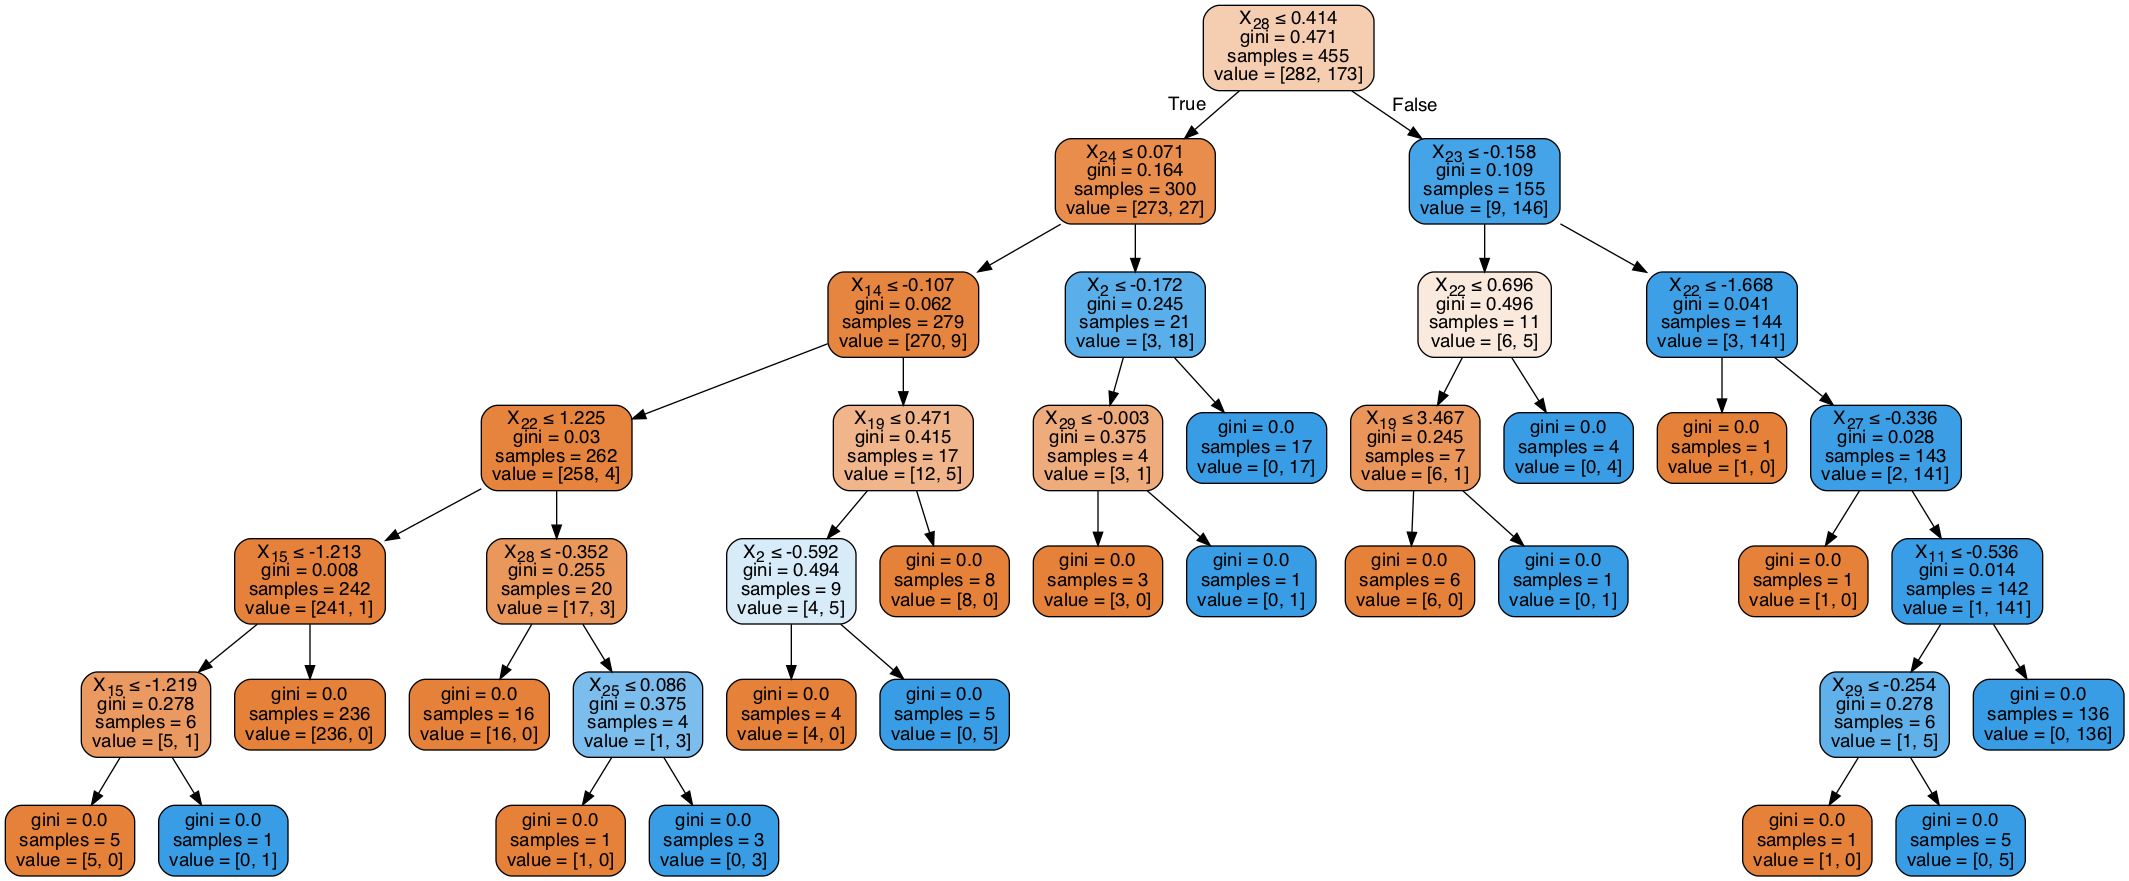

In [174]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Boosted Decision Tree

In [175]:
from sklearn.ensemble import AdaBoostClassifier

In [176]:
ada_boosted_dt = AdaBoostClassifier(
    base_estimator= classifier_dtree, n_estimators=50)

In [177]:
ada_boosted_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [178]:
# Predicting the Test set results
y_pred = ada_boosted_dt.predict(X_test)

AdaBoosted Decision Tree, Classification Results:
Accuracy: 0.9210526315789473

Confusion Matrix:
[[70  5]
 [ 4 35]]


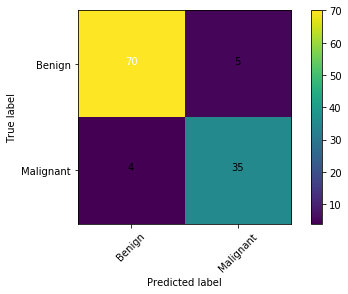

In [179]:
print("AdaBoosted Decision Tree, Classification Results:")
prediction_results(y_pred)

### Support Vector Machine

In [180]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf',  C = 2.0)
classifier_svm.fit(X_train, y_train)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [181]:
# Predicting the Test set results
y_pred = classifier_svm.predict(X_test)

In [182]:
print("Support Vector Machine, Classification Results:")

Support Vector Machine, Classification Results:


Accuracy: 0.9736842105263158

Confusion Matrix:
[[74  1]
 [ 2 37]]


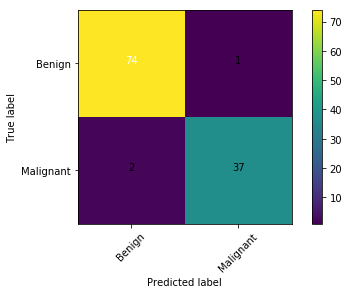

In [183]:
prediction_results(y_pred)

### K-Nearest Neighbors

#### Testing Different K-Values

In [184]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 13)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(p=2, n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

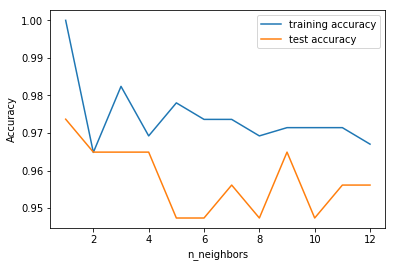

In [185]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### Train Model

In [186]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p=1, n_neighbors = 11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=1,
           weights='uniform')

In [187]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [188]:
print("K-nearest Neighbors, Classification Results:")

K-nearest Neighbors, Classification Results:


Accuracy: 0.9473684210526315

Confusion Matrix:
[[73  2]
 [ 4 35]]


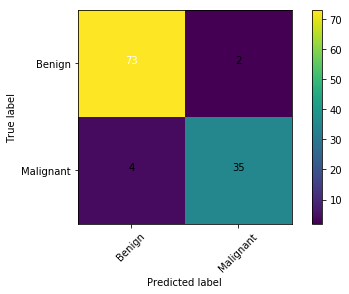

In [189]:
prediction_results(y_pred)

#### Visualize Results

In [190]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
classifier_pca = KNeighborsClassifier(n_neighbors = 11)
classifier_pca.fit(pca_2d(X_train, y_train, ret_x=True), y_train)

PCA Explained Variance Ratio[0.42465182 0.18755817]
PCA CUM SUM: [0.42465182 0.61221   ]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [191]:
# Predicting the Test set results
y_pred = classifier_pca.predict(pca_2d(X_test, ret_x=True))

PCA Explained Variance Ratio[0.43241605 0.18631796]
PCA CUM SUM: [0.43241605 0.61873401]


### Artificial Neural Networks

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.9736842105263158

Confusion Matrix:
[[74  1]
 [ 2 37]]


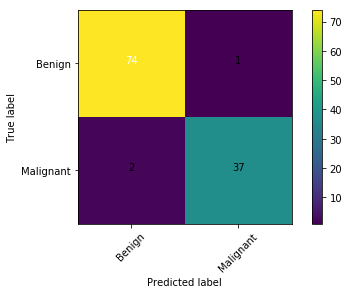

In [192]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(9, 9), max_iter=350)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
prediction_results(y_pred)